In [86]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
     

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## What is MNIST dataset?
- It is a dataset of 60,000 small square 28×28 pixel grayscale images of handwritten single digits between 0 and 9.

In [4]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()

In [5]:
X_train_full

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full[0].shape

(28, 28)

In [8]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

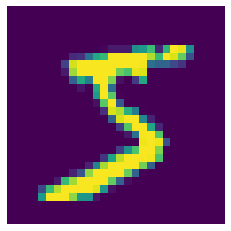

In [9]:
plt.imshow(X_train_full[0])
plt.axis("off")
plt.show()

# How this number is created into the array ?

<AxesSubplot:>

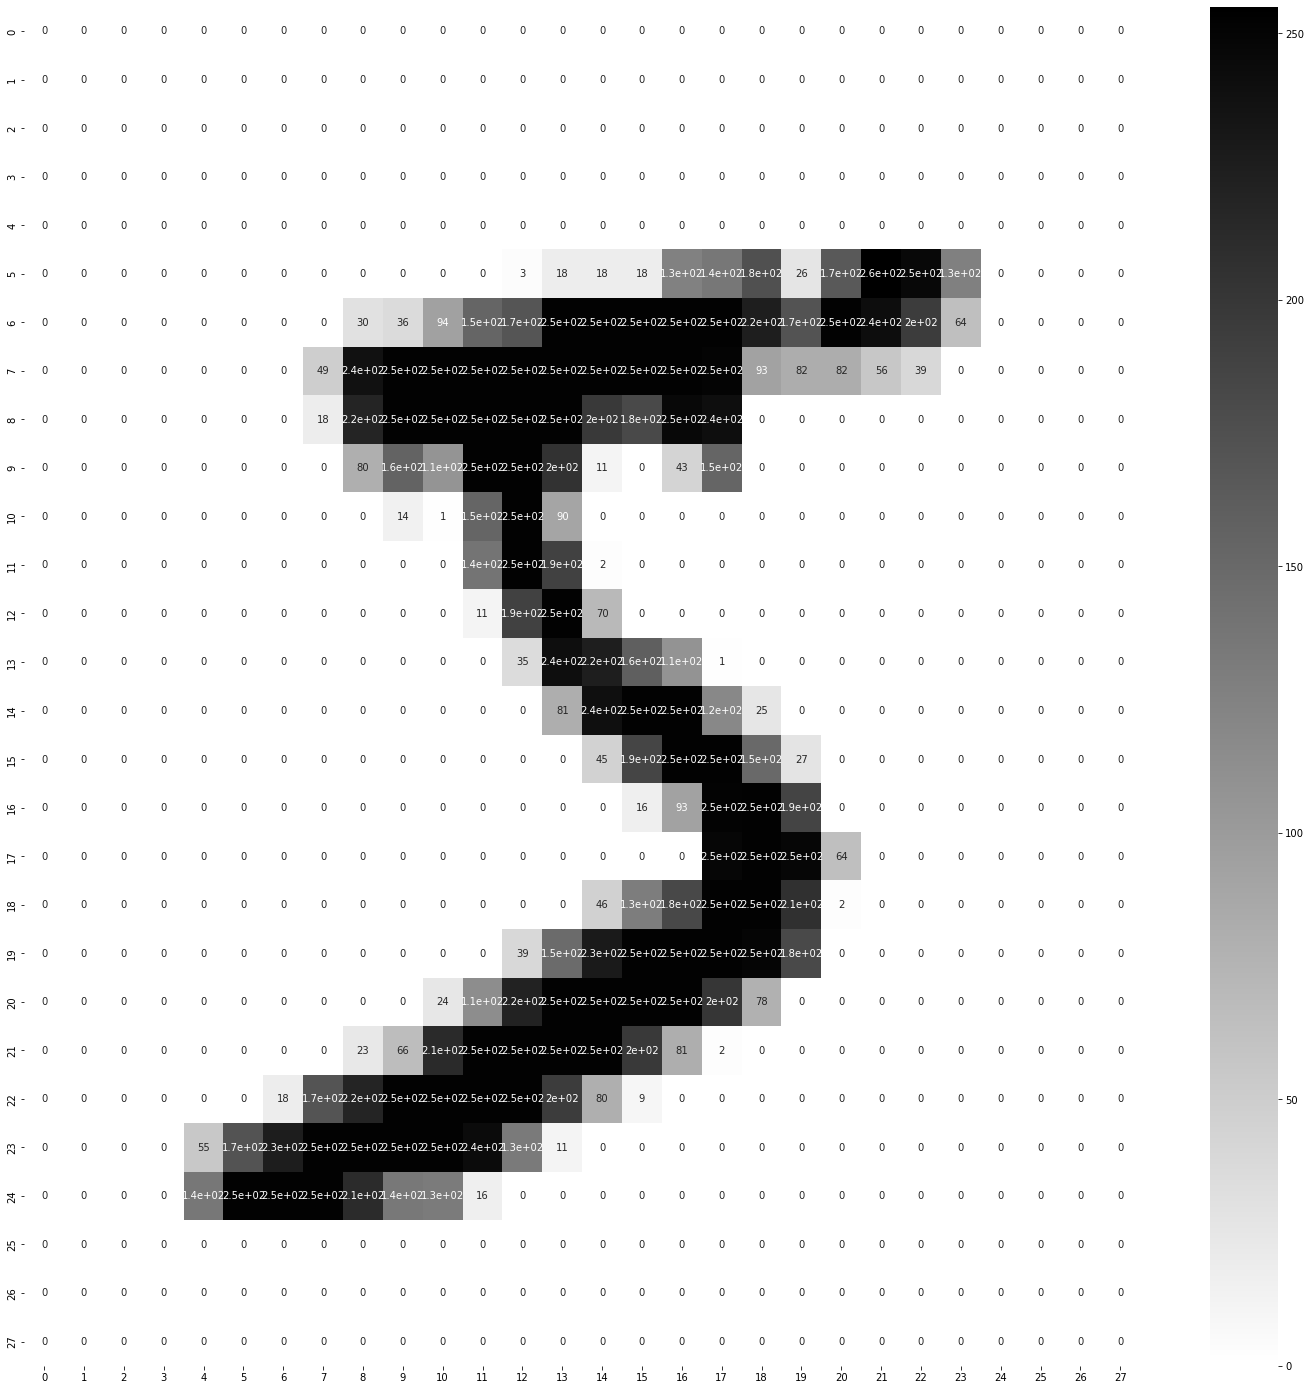

In [10]:
plt.figure(figsize=(25,25))
sns.heatmap(X_train_full[0],annot=True,cmap="binary")

In [12]:
# Scale the data between 0 to 1 by dividing it by 255. as its an unsigned data between 0-255 range ... This is called as unit scaling

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [13]:
# scale the test set as well
X_test = X_test / 255.     

In [14]:
print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


<AxesSubplot:>

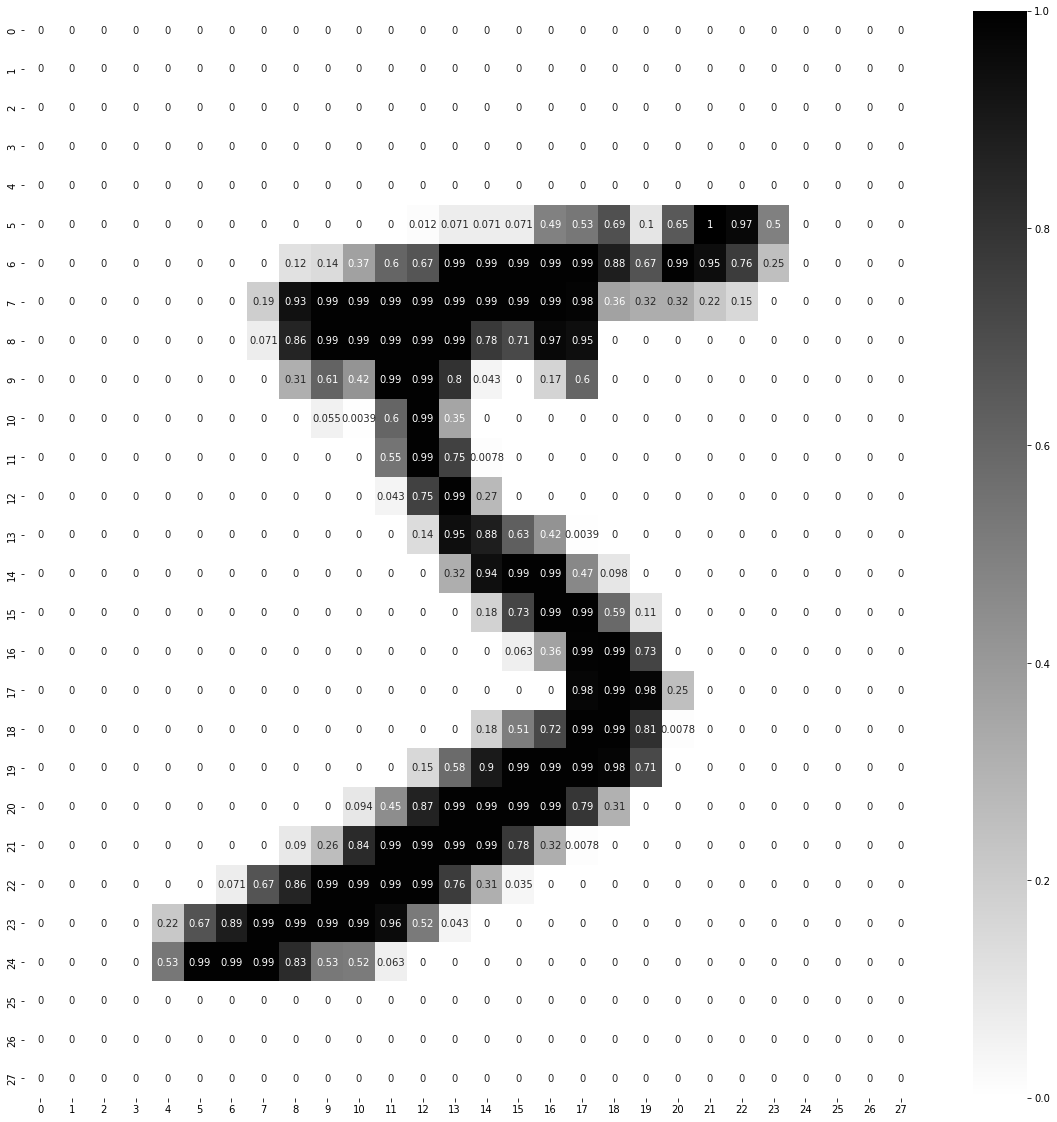

In [17]:
plt.figure(figsize=(20,20))
sns.heatmap(X_valid[0],annot=True,cmap="binary")

In [44]:
LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

In [45]:
 
# you need to build a best to best model with hyperpparameter tuning

# for the hyperparameter tuning you need to use keras tuner


     

In [46]:

model_clf=tf.keras.models.Sequential(LAYERS)

In [47]:
model_clf.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


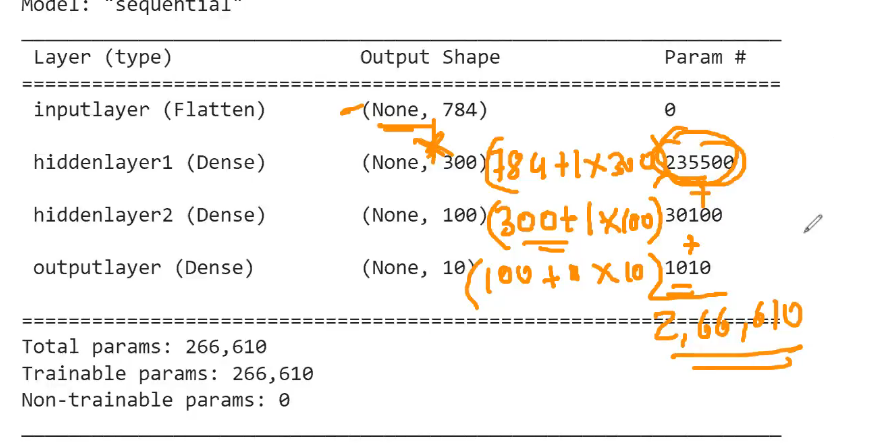

In [58]:
LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=['accuracy', 'Precision', 'Recall', 'AUC', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives']

In [59]:
model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [60]:
# to see the layers 

In [31]:
model_clf.layers

In [39]:
model_clf.layers[1].name

'hiddenlayer1'

In [40]:
hidden1=model_clf.layers[1]

In [41]:
# to get the weight
weights,biases=hidden1.get_weights()

In [42]:
weights,biases

(array([[ 0.06526446, -0.06934057, -0.01123867, ...,  0.00088285,
         -0.03988452, -0.03032171],
        [-0.02625608, -0.0590979 ,  0.0301725 , ...,  0.05356313,
         -0.05892712, -0.05380682],
        [-0.0349355 , -0.05878603, -0.02003494, ...,  0.03527742,
          0.03505632,  0.01504814],
        ...,
        [ 0.00175335, -0.01545754,  0.0459865 , ..., -0.00216176,
          0.040565  , -0.03900185],
        [ 0.03048945,  0.00243429,  0.02602337, ..., -0.03241348,
         -0.04297123,  0.05623479],
        [-0.00292195,  0.02204095,  0.07278663, ..., -0.05290633,
         -0.03278489,  0.02568626]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [61]:
EPOCHS=10
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET) 

Epoch 1/10
1719/1719 [==============================] - 16s 6ms/step - loss: 0.2147 - accuracy: 0.9348 - val_loss: 0.1007 - val_accuracy: 0.9702
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.9732 - val_loss: 0.0927 - val_accuracy: 0.9720
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0616 - accuracy: 0.9801 - val_loss: 0.0682 - val_accuracy: 0.9794
Epoch 4/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0435 - accuracy: 0.9855 - val_loss: 0.0723 - val_accuracy: 0.9784
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0376 - accuracy: 0.9877 - val_loss: 0.0862 - val_accuracy: 0.9766
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.0282 - accuracy: 0.9907 - val_loss: 0.0891 - val_accuracy: 0.9778
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.0723 - val_accura

In [77]:
import time 
import os
def saveModel_path(model_dir="SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

In [78]:
model_clf.save(saveModel_path())

your model will be saved at the following location
SAVED_MODELS/Model_2023_02_08_19_55_43_.h5


In [64]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [65]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.214679,0.934764,0.100705,0.9702
1,0.087691,0.973200,0.092682,0.9720
2,0.061584,0.980127,0.068172,0.9794
3,0.043506,0.985545,0.072281,0.9784
4,0.037601,0.987709,0.086156,0.9766
5,0.028237,0.990709,0.089092,0.9778
6,0.023290,0.992527,0.072253,0.9828
7,0.021871,0.992636,0.077497,0.9820
8,0.017290,0.994200,0.076630,0.9828
9,0.017062,0.994473,0.097322,0.9804


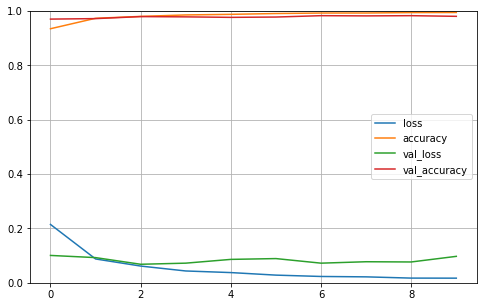

In [66]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()
     

In [67]:
model_clf.evaluate(X_test,y_test)
     

313/313 [==============================] - 2s 6ms/step - loss: 0.1076 - accuracy: 0.9776


[0.10760478675365448, 0.9775999784469604]

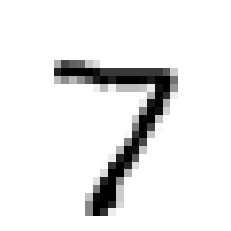

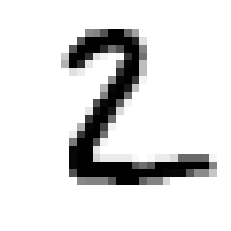

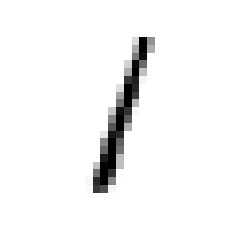

In [68]:
for i in range(0,3):
  #print(i)
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()


In [69]:
prediction=model_clf.predict(X_test[:3])

1/1 [==============================] - 1s 579ms/step


In [70]:
prediction

array([[8.5225896e-13, 1.5339668e-10, 1.7825741e-11, 4.7250200e-11,
        3.2800765e-14, 4.6590664e-14, 2.2517485e-14, 1.0000000e+00,
        1.2458655e-13, 3.3742653e-10],
       [1.7864056e-12, 1.9914195e-13, 1.0000000e+00, 2.5686291e-12,
        4.3284710e-29, 2.7441652e-20, 9.2691006e-19, 2.2745752e-21,
        8.6424439e-14, 3.8750260e-24],
       [1.4523067e-07, 9.9997056e-01, 1.5556501e-06, 3.5111249e-08,
        6.8559730e-06, 4.2836407e-10, 2.3468322e-06, 1.8666146e-06,
        1.6671340e-05, 2.9601252e-10]], dtype=float32)

In [71]:
y_prob=prediction[0]

In [73]:
y_prob

array([8.5225896e-13, 1.5339668e-10, 1.7825741e-11, 4.7250200e-11,
       3.2800765e-14, 4.6590664e-14, 2.2517485e-14, 1.0000000e+00,
       1.2458655e-13, 3.3742653e-10], dtype=float32)

In [74]:
y_prob.round(5)

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [72]:
np.argmax(y_prob.round(5))

7

Signature: np.argmax(a, axis=None, out=None, *, keepdims=<no value>)
    
Docstring:
    
Returns the indices of the maximum values along an axis.

In [83]:
# load the model
from tensorflow.keras.models import load_model
model=load_model(r"D:\full_stack\MyPractice\Deep Learning\mnist\SAVED_MODELS\Model_2023_02_08_19_55_43_.h5")

**Tensorboard w.r.t callback**

In [95]:

#tensorboard
import time

def get_log_path(log_dir="logs/fit"):
    fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S")    
    log_path = os.path.join(log_dir, fileName)
    print(f"saving logs at:\n{log_path}")
    return log_path

log_dir = get_log_path()

saving logs at:
logs/fit\log_2023_02_09_00_59_53


In [96]:
tensorboard_callback =tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [97]:
EPOCHS=10
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET,callbacks=[tensorboard_callback])
     

Epoch 1/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.1059 - val_accuracy: 0.9814
Epoch 2/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0071 - accuracy: 0.9980 - val_loss: 0.1251 - val_accuracy: 0.9822
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0091 - accuracy: 0.9970 - val_loss: 0.1433 - val_accuracy: 0.9802
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.0086 - accuracy: 0.9975 - val_loss: 0.1225 - val_accuracy: 0.9832
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0072 - accuracy: 0.9977 - val_loss: 0.1117 - val_accuracy: 0.9858
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.1522 - val_accuracy: 0.9792
Epoch 7/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.0089 - accuracy: 0.9975 - val_loss: 0.1304 - val_ac

In [98]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [99]:
%reload_ext tensorboard

In [100]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 20644), started 0:03:19 ago. (Use '!kill 20644' to kill it.)